# AudioMoth Sample Data

This notebook looks at the sample data given by the wildlife trust. Aim is to confirm the data is as expected.

Format 

In [19]:
import sys, os
from pathlib import Path

# Go up one level to .../audiomoth
project_root = Path(os.getcwd()).resolve().parent

# Add project root to sys.path so `src` is importable
sys.path.insert(0, str(project_root))

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import src.normaliser as normaliser
import src.audio_moth_schema as audio_moth_schema

EXCEL_PATH = Path(r"C:\\Users\\katri\\Documents\\erccis\\audiomoth\\data_raw\\audiomoth_sample.xlsx")

# Make pandas show more columns/rows while exploring
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

EXCEL_PATH, EXCEL_PATH.exists()

(WindowsPath('C:/Users/katri/Documents/erccis/audiomoth/data_raw/audiomoth_sample.xlsx'),
 True)

## Load sheet names

In [20]:
# List available sheets in the Excel file
xls = pd.ExcelFile(EXCEL_PATH)
xls.sheet_names

['Overview', 'CWT2', 'CWT3', 'CWT5', 'CWT11', 'CWT17']

## Load Deployment Data

In [21]:
# Load the first sheet as deployment metadata (adjust if needed)
meta = pd.read_excel(EXCEL_PATH, sheet_name=0)
print(meta.shape)
meta.head()

(5, 7)


,Device,Site,Location,Habitat,W3W,Deployment Date,Deployment Time
0,CWT2,Red Moor,RM3,Heathland,class.graphics.florists,2025-02-10,12:58
1,CWT3,Crift,CT1,Dense scrub,haggling.putts.wink,2025-02-10,14:36
2,CWT5,Breney Common,BC4,Lowland deciduous,Quietly.splashes.wide,2025-02-10,10:36
3,CWT11,Lowertown,LT1,Dense scrub,aviation.shippers.supported,2025-02-13,08:48
4,CWT17,Creney Farm,CF2,Improved grassland,lyricism.rewarding.insects,2025-02-10,10:28


## Load CWT2 Device Data

In [22]:
# Choose a device sheet to explore. Previewing the first 5 rows.
device_sheet_index = 1 
CWT2_df = pd.read_excel(EXCEL_PATH, sheet_name=device_sheet_index)

print(CWT2_df.shape)
CWT2_df.head()

(8290, 8)


,Start (s),End (s),Scientific name,Common name,Confidence,File,Date,Time
0,27,30,Strix aluco,Tawny Owl,0.8614,D:/Feb 10 - 16\20250210_130500.WAV,2025-02-10,13:05:00
1,57,60,Troglodytes troglodytes,Eurasian Wren,0.9759,D:/Feb 10 - 16\20250210_130500.WAV,2025-02-10,13:05:00
2,21,24,Troglodytes troglodytes,Eurasian Wren,0.7418,D:/Feb 10 - 16\20250210_132000.WAV,2025-02-10,13:20:00
3,24,27,Troglodytes troglodytes,Eurasian Wren,0.8671,D:/Feb 10 - 16\20250210_132000.WAV,2025-02-10,13:20:00
4,27,30,Troglodytes troglodytes,Eurasian Wren,0.7567,D:/Feb 10 - 16\20250210_132000.WAV,2025-02-10,13:20:00


## Basic normalisation
Standardise column names and parse timestamps if present.


In [23]:
# Lowercase/underscore column names (non-destructive copy)
CWT2_df = normaliser.clean_audiomoth_column_names(CWT2_df)

# Convert 'time' column to datetime as pandera cant handle object type for datetime columns
CWT2_df["time"] = CWT2_df["time"].astype(str).str.strip()
CWT2_df["time"] = pd.to_datetime(CWT2_df["time"], errors="coerce")

# Validate and convert types according to AudioMoth schema
CWT2_df = audio_moth_schema.AudioMothSchema.validate(CWT2_df)


C:\Users\katri\AppData\Local\Temp\ipykernel_2888\2859205236.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CWT2_df["time"] = pd.to_datetime(CWT2_df["time"], errors="coerce")


## Quick Summaries


common_name
Common Chiffchaff       1291
Eurasian Linnet         1206
Tawny Owl                853
Eurasian Wren            841
European Robin           612
Eurasian Blue Tit        492
Coal Tit                 413
Long-tailed Tit          397
Dunnock                  318
Marsh Tit                265
Yellowhammer             169
Redwing                  141
Great Tit                135
Ring-necked Pheasant     104
Common Chaffinch          94
Name: count, dtype: int64

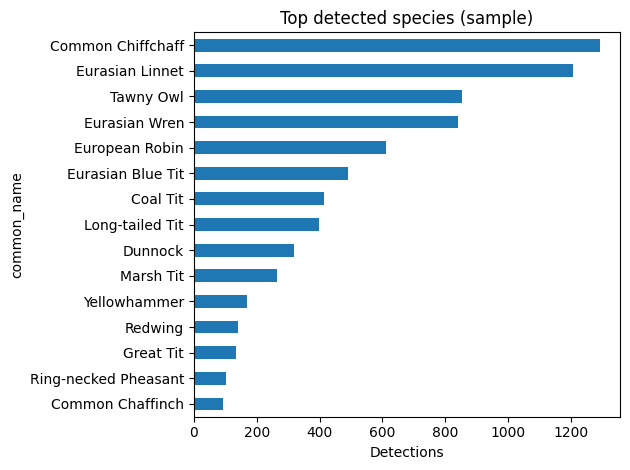

In [24]:
# Top species by count

species_col = 'common_name'  # Adjust if needed
top_species = (CWT2_df[species_col]
                .value_counts()
                .head(15))
display(top_species)

# Plot top species

plt.figure()
top_species.sort_values().plot(kind='barh')
plt.title('Top detected species (sample)')
plt.xlabel('Detections')
plt.tight_layout()
plt.show()

## Hour of day activity

hour
0      83
1      84
2      41
3     101
4     136
5     284
6     642
7     906
8     761
9     675
10    718
11    452
12    445
13    445
14    458
15    378
16    343
17    410
18    553
19    172
20     34
21     64
22     61
23     44
Name: count, dtype: int64

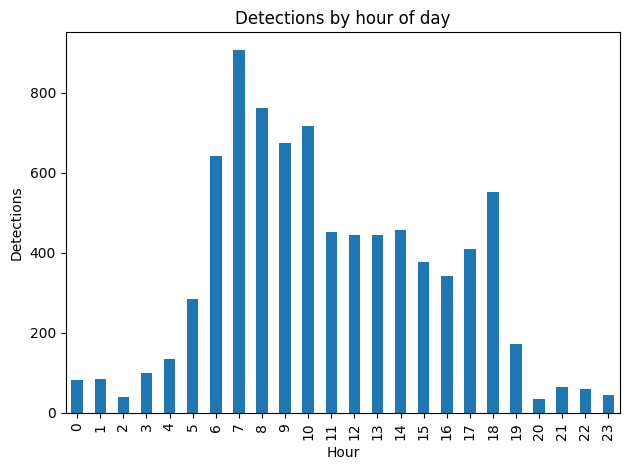

In [25]:
# Pick a timestamp column if present
ts_col = 'time'

CWT2_df['hour'] = CWT2_df[ts_col].dt.hour
hourly_counts = CWT2_df['hour'].value_counts().sort_index()
display(hourly_counts)

# Plot hourly activity
plt.figure()
hourly_counts.plot(kind='bar')
plt.title('Detections by hour of day')
plt.xlabel('Hour')
plt.ylabel('Detections')
plt.tight_layout()
plt.show()
